In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

# 图像分类数据集
MNIST数据集 (LeCun et al., 1998) 是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。 我们将使用类似但更复杂的Fashion-MNIST数据集 (Xiao et al., 2017)。
Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。
## 读取数据集
我们可以通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

In [3]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

每个输入图像的高度和宽度均为28像素。 
数据集由灰度图像组成，其通道数为1。

In [4]:
mnist_train[0][0].shape
# 输出为torch.Size([1, 28, 28])，表示图像的通道数为1（灰度图像），高和宽均为28像素。


torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [5]:
# 返回Fashion-MNIST数据集的文本标签，将数字转换为对应的文本标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
    # 对于每个标签，使用int()将其转换为整数索引，然后从text_labels列表中获取对应的文本标签
    # 例如，labels为[0, 1, 4, 7]时，
    # get_fashion_mnist_labels(labels)返回['t-shirt', 'trouser', 'coat', 'sneaker']

In [6]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

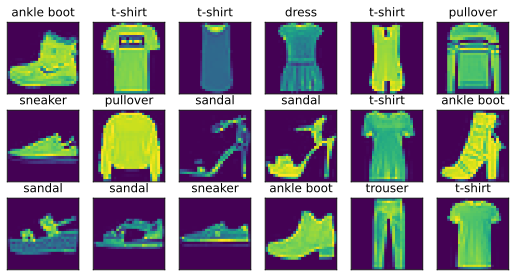

In [7]:
# 查看图像示例
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6, titles=get_fashion_mnist_labels(y));

## 获取小批量数据
使用内置数据迭代器，每次读取大小为batch_size的小批量数据。

In [8]:
batch_size = 256

def get_dataloader_workers():
    # 使用4个进程来读取数据
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

## 整合所有组件
定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 这个函数返回训练集和验证集的数据迭代器。 此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状。

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize)) # 将图像大小调整为指定的形状
    trans = transforms.Compose(trans) # 将多个变换组合成一个变换
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

这就是读取Fashion-MNIST数据的函数了，我们将这个函数添加到MyTool文件中。